In [1]:
import pandas as pd
cnn_df=pd.read_csv('after_lsa1_data_to_compare.csv')

In [3]:
cnn_df.head()

,Email Text,Email Type,LSA Embeddings
0,breathtaking image for your company now workin...,Phishing Email,[ 3.03347639e-01 1.79753165e-01 -2.04226572e-...
1,how to substantially increase saleseasily acce...,Phishing Email,[ 3.75208855e-01 1.03346975e-01 -2.18870916e-...
2,epac pt e carnoali genie com e carolan genie c...,Phishing Email,[ 3.72480295e-01 1.58124799e-01 -1.95396129e-...
3,about aptconf there are these lines rpm leave ...,Safe Email,[ 1.06917656e-01 5.63415799e-04 -2.28154267e-...
4,cialis soft tabs pre scriptions new clalls sof...,Phishing Email,[ 0.14484777 0.03201964 -0.01029263 -0.033225...


In [5]:
cnn_df.describe()

,Email Text,Email Type,LSA Embeddings
count,13114,13116,13116
unique,13020,2,12706
top,alink texdecoration noneaactive textdecoration...,Phishing Email,[ 2.19961732e-02 -3.45981645e-02 6.34245211e-...
freq,6,6558,30


In [7]:
# Check the first few rows of the BERT Embeddings column
print(cnn_df['LSA Embeddings'].head())

# Check the type of the first entry in the BERT Embeddings column
print(type(cnn_df['LSA Embeddings'][0]))


0    [ 3.03347639e-01  1.79753165e-01 -2.04226572e-...
1    [ 3.75208855e-01  1.03346975e-01 -2.18870916e-...
2    [ 3.72480295e-01  1.58124799e-01 -1.95396129e-...
3    [ 1.06917656e-01  5.63415799e-04 -2.28154267e-...
4    [ 0.14484777  0.03201964 -0.01029263 -0.033225...
Name: LSA Embeddings, dtype: object
<class 'str'>


In [9]:
def fix_embedding_format(embedding_str):
    # Replace spaces with commas, ensuring proper formatting for lists
    return '[' + ','.join(embedding_str.strip('[]').split()) + ']'

# Apply the formatting fix
cnn_df['LSA Embeddings'] = cnn_df['LSA Embeddings'].apply(fix_embedding_format)

In [11]:
import numpy as np
import ast

# Convert string embeddings to actual NumPy arrays
cnn_df['LSA Embeddings'] = cnn_df['LSA Embeddings'].apply(lambda x: np.array(ast.literal_eval(x)))


In [12]:
print(type(cnn_df['LSA Embeddings'][0]))  # Should output <class 'numpy.ndarray'>
print(cnn_df['LSA Embeddings'][0].shape)  # Should show the shape of the embedding


<class 'numpy.ndarray'>
(300,)


In [15]:
# !pip install sklearn
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split

# # Initialize a list to store the cleaned embeddings
# X_cleaned = []

# for emb in cnn_df['LSA Embeddings']:
#     try:
#         # Ensure emb is a valid numpy array
#         if isinstance(emb, np.ndarray):
#             # Remove 'Ellipsis' from the embedding
#             emb = emb[emb != Ellipsis]
            
#             # Filter out zero values
#             non_zero_emb = emb[emb != 0]
            
#             # Only keep embeddings that have at least one non-zero value
#             if non_zero_emb.size > 0:
#                 X_cleaned.append(non_zero_emb)
#             else:
#                 print(f"Skipping embedding with no non-zero values after cleaning: {emb}")
#         else:
#             print(f"Skipping invalid entry (not numpy array): {emb}")
#             continue
#     except Exception as e:
#         print(f"Skipping invalid entry due to error: {e}")
#         continue

# # Convert the cleaned list into a numpy array
# X_cleaned = np.array(X_cleaned)

X_cleaned = np.array(cnn_df['LSA Embeddings'].tolist())  # Directly convert to NumPy array


# Ensure that we have enough valid data
if X_cleaned.size == 0:
    print(f"Total number of valid embeddings: {len(X_cleaned)}")
    raise ValueError("No valid embeddings found after cleaning. Please check the data.")

# Proceed with the remaining steps as before (e.g., train-test split)
y = cnn_df['Email Type']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=2)

# Reshape X to make it 3D for CNN input (num_samples, time_steps=1, embedding_dim)
X_cleaned = np.expand_dims(X_cleaned, axis=1)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Cast X_train and X_test to float32 to avoid data type issues
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Check the shapes of the data
print(f"Shape of X_train: {X_train.shape}")  # Should be (num_samples, 1, embedding_dim)
print(f"Shape of y_train: {y_train.shape}")  # Should be (num_samples, 2)


Shape of X_train: (10492, 1, 300)
Shape of y_train: (10492, 2)


In [17]:
# Cast X_train and X_test to float32 to avoid data type issues
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7377 - loss: 0.5486 - val_accuracy: 0.9700 - val_loss: 0.0884
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9598 - loss: 0.1076 - val_accuracy: 0.9752 - val_loss: 0.0709
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0777 - val_accuracy: 0.9795 - val_loss: 0.0634
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0628 - val_accuracy: 0.9771 - val_loss: 0.0676
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0492 - val_accuracy: 0.9800 - val_loss: 0.0625
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.0452 - val_accuracy: 0.9757 - val_loss: 0.0674
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0372 - val_accuracy: 0.9767 - val_loss: 0.0683
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0

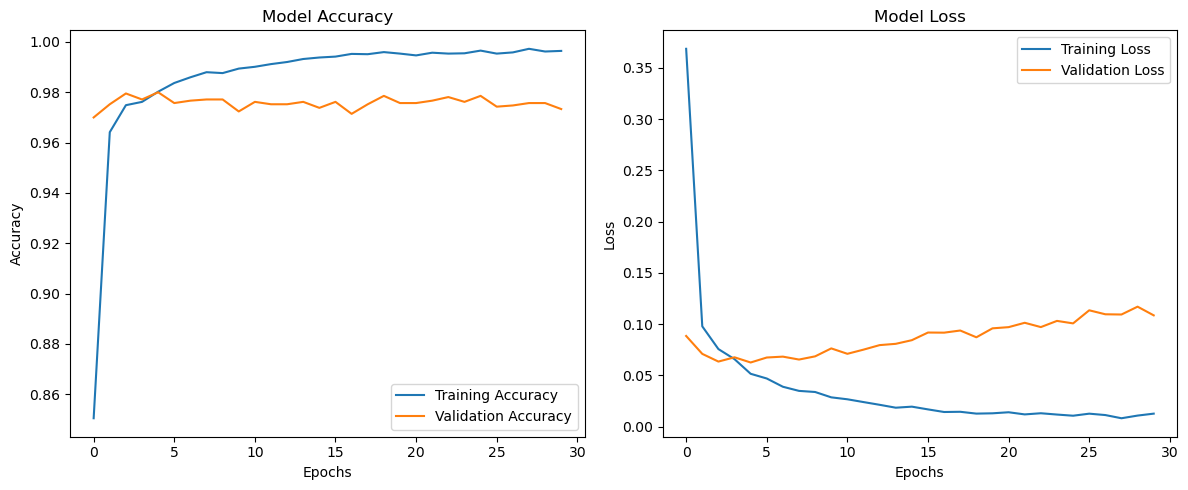

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()